In [1]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [2]:
# Overview data
dataset = pd.read_csv("tempo.csv", sep=";")

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [22]:
dataset

,Appearence,Temperature,Humidity,Wind,Play
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
6,sol,64.0,65.0,VERDADEIRO,sim
7,sol,73.5,95.0,FALSO,nao
8,sol,69.0,70.0,FALSO,sim
9,chuva,75.0,85.5,FALSO,sim


In [3]:
# Exploratory Analise
dataset.columns = ["Appearence", "Temperature", "Humidity", "Wind", "Play"]
dataset.head()

,Appearence,Temperature,Humidity,Wind,Play
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [20]:
dataset.isnull().sum()

Appearence     0
Temperature    0
Humidity       0
Wind           0
Play           0
dtype: int64

In [5]:
# Explore categorical data
# Appearence

groupped = dataset.groupby(['Appearence']).size()
groupped

Appearence
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [6]:
# Fix Appearence
dataset.loc[dataset['Appearence'] == 'menos', 'Appearence'] = 'sol'
groupped = dataset.groupby(['Appearence']).size()
groupped

Appearence
chuva      5
nublado    3
sol        6
dtype: int64

In [7]:
# Explore categorical data
# Wind
groupped = dataset.groupby(['Wind']).size()
groupped

Wind
FALSO         7
VERDADEIRO    6
dtype: int64

In [8]:
# Fix NA Wind
dataset['Wind'].fillna('FALSO', inplace=True)

In [9]:
# Explore categorical data
# Play

groupped = dataset.groupby(['Play']).size()
groupped

Play
nao    5
sim    9
dtype: int64

In [10]:
dataset['Play'].isnull().sum()

0

In [11]:
# Explore numeric data
# Temperature

dataset['Temperature'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperature, dtype: float64

Text(0.5, 1.0, 'Temperature')

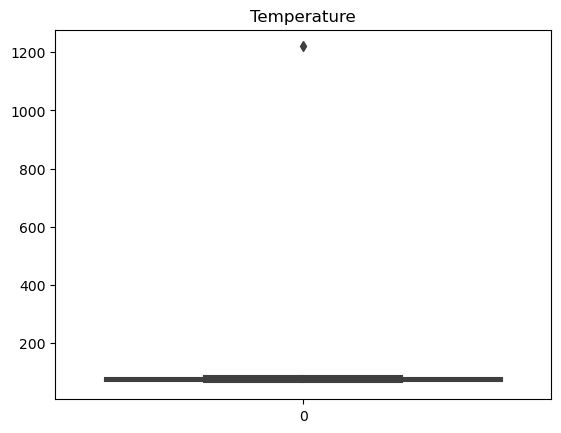

In [12]:
srn.boxplot(data=dataset['Temperature']).set_title('Temperature')

Text(0.5, 1.0, 'Temperature')

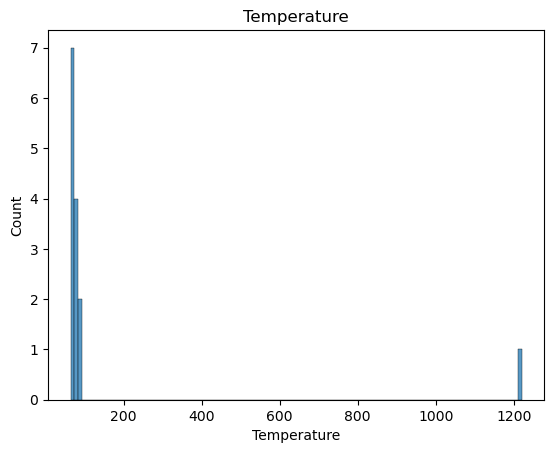

In [13]:
srn.histplot(dataset['Temperature']).set_title('Temperature')

In [14]:
# Fix Temperature
dataset.loc[dataset['Temperature'] > 130, 'Temperature'] = sts.median(dataset['Temperature'])

In [17]:
# Explore numeric data
# Humidity

dataset['Humidity'].describe()

count    13.000000
mean     80.961538
std       9.896257
min      65.000000
25%      70.000000
50%      85.000000
75%      90.000000
max      95.000000
Name: Humidity, dtype: float64

In [16]:
# Fix Humidity
dataset.loc[dataset['Humidity'] > 100, 'Humidity'] = sts.median(dataset['Humidity'])

In [19]:
dataset['Humidity'].fillna(sts.median(dataset['Humidity']), inplace = True)